# MSN 514 - Chapter 08: Mandelbrot

## Mandelbrot set

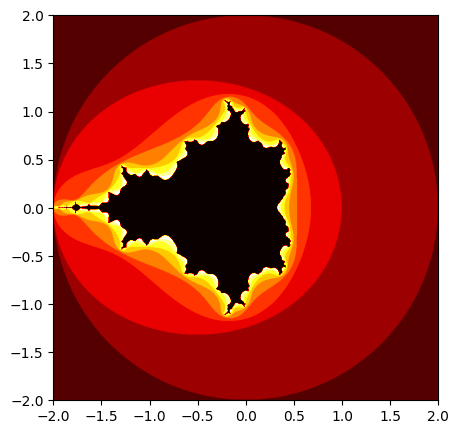

In [40]:
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import clear_output

N = 1000
max_iter = 10
x_min, x_max = -2.0, 2.0
y_min, y_max = -2.0, 2.0
x, y = np.meshgrid(np.linspace(x_min,x_max,N), np.linspace(y_min,y_max,N))
c = x + 1j * y

s = np.zeros(c.shape, dtype=int)
z = np.zeros(c.shape, dtype=complex)
for n in range(1,max_iter):
    nz = np.where(np.abs(z) < 2)
    z[nz] = z[nz]**2 + c[nz]
    s[np.where((np.abs(z) > 2) & (s == 0))] = n
# clear_output(wait=True)
plt.figure(figsize=(5,5))
plt.imshow(s, extent=(x_min, x_max, y_min, y_max), cmap='hot')
plt.show()
    # plt.pause(1)
    

### Matlab code with zooming

In [ ]:
clear
mandelbrot([-2;1],[-1.5;1.5]);
while true
    [xi,yi] = ginput(2);
    mandelbrot(xi,yi);
end

function mandelbrot(xi,yi)
if (xi(1) == xi(2))
    xi = [-2;1]; yi = [-1.5;1.5];
end
N = 200;
[x,y] = meshgrid(linspace(xi(1), xi(2), 1000), linspace(yi(1), yi(2), 1000));
c = x + 1i * y;
z = c;
s = zeros(size(c));
for n = 1 : N
    z   = z.^2 + c;
    s(abs(z) > 2 & s == 0) = n;
end
imagesc([xi(1) xi(2)],[yi(1) yi(2)],s);
colormap hot;
axis equal off;
drawnow;
end

### Periodic cycles

In [11]:
import pygame
import numpy as np

# Function to generate the Mandelbrot set
def mandelbrot_set(xmin, xmax, ymin, ymax, width, height, max_iter):
    x = np.linspace(xmin, xmax, width)
    y = np.linspace(ymin, ymax, height)
    X, Y = np.meshgrid(x, y)
    C = X + 1j * Y
    Z = np.zeros_like(C)
    iteration = np.zeros(C.shape, dtype=int)

    for i in range(max_iter):
        mask = np.abs(Z) <= 2
        Z[mask] = Z[mask] ** 2 + C[mask]
        iteration[mask] = i
    iteration[iteration == max_iter-1] = 0

    return iteration

def zoom(xmin, xmax, ymin, ymax, mouse_x, mouse_y, window_width, window_height, zoom_factor):
    # Calculate the new xmin, xmax, ymin, ymax based on the mouse position
    x_range = xmax - xmin
    y_range = ymax - ymin
    x_mid = xmin + (mouse_x / window_width) * x_range
    y_mid = ymin + (mouse_y / window_height) * y_range

    new_xmin = x_mid - x_range / zoom_factor / 2
    new_xmax = x_mid + x_range / zoom_factor / 2
    new_ymin = y_mid - y_range / zoom_factor / 2
    new_ymax = y_mid + y_range / zoom_factor / 2
    
    # Update the parameters for generating the Mandelbrot set
    xmin, xmax = new_xmin, new_xmax
    ymin, ymax = new_ymin, new_ymax
    
    # Generate the new Mandelbrot set
    s = mandelbrot_set(xmin, xmax, ymin, ymax, width, height, max_iter)
    
    # Create a new Pygame surface
    surface = pygame.surfarray.make_surface(s.T)
    
    # Blit the new surface onto the window
    window.blit(surface, (0, 0))
    
    # Update the display
    pygame.display.flip()

    return xmin, xmax, ymin, ymax, surface


def cycles(xmin, xmax, ymin, ymax, window_width, window_height, max_iter):
    # Get the position of the mouse
    mouse_pos = pygame.mouse.get_pos()
    
    x = (mouse_pos[0] / window_width) * (xmax - xmin) + xmin
    y = (mouse_pos[1] / window_height) * (ymax - ymin) + ymin
    c0 = x + 1j * y
    z = 0
    for i in range(max_iter):
        z = z**2 + c0
        if np.abs(z) > 2:
            break
        xz = int((np.real(z) - xmin) / (xmax - xmin) * window_width)
        yz = int((np.imag(z) - ymin) / (ymax - ymin) * window_height)
        pygame.draw.circle(window, (int(50+i/max_iter*200), int(50+i/max_iter*200), 0), (xz, yz), 5)

    # Update the display
    pygame.display.flip()

# Parameters
xmin, xmax = -2.0, 1.0
ymin, ymax = -1.5, 1.5
width, height = 1000, 1000
max_iter = 200

# Generate the Mandelbrot set
s = mandelbrot_set(xmin, xmax, ymin, ymax, width, height, max_iter)

# Initialize Pygame
pygame.init()

# Create a Pygame surface
surface = pygame.surfarray.make_surface(s.T)

# Create a Pygame window
window_width, window_height = width, height
window = pygame.display.set_mode((window_width, window_height))

# Blit the surface onto the window
window.blit(surface, (0, 0))

# Update the display
pygame.display.flip()

# Main loop
running = True
zoom_in = 2.0  # Zoom factor for zooming in
zoom_out = 0.5  # Zoom factor for zooming out
while running:

    # Blit the new surface onto the window
    window.blit(surface, (0, 0))
    
    cycles(xmin, xmax, ymin, ymax, window_width, window_height, max_iter)

    for event in pygame.event.get():
        if event.type == pygame.QUIT:
            running = False
        elif event.type == pygame.KEYDOWN:
            if event.key == pygame.K_z:
                # Get the mouse position
                mouse_x, mouse_y = pygame.mouse.get_pos()
                # Zoom in
                xmin, xmax, ymin, ymax, surface = \
                    zoom(xmin, xmax, ymin, ymax, mouse_x, mouse_y, window_width, window_height, zoom_in)
            elif event.key == pygame.K_x:
                # Get the mouse position
                mouse_x, mouse_y = pygame.mouse.get_pos()
                # Zoom out
                xmin, xmax, ymin, ymax, surface = \
                    zoom(xmin, xmax, ymin, ymax, mouse_x, mouse_y, window_width, window_height, zoom_out)
            elif event.key == pygame.K_r:
                # Reset the parameters
                xmin, xmax = -2.0, 1.0
                ymin, ymax = -1.5, 1.5
                # Generate the Mandelbrot set
                xmin, xmax, ymin, ymax, surface = \
                    zoom(xmin, xmax, ymin, ymax, mouse_x, mouse_y, window_width, window_height, 1)

# Quit Pygame
pygame.quit()

KeyboardInterrupt: 

## Chaos game

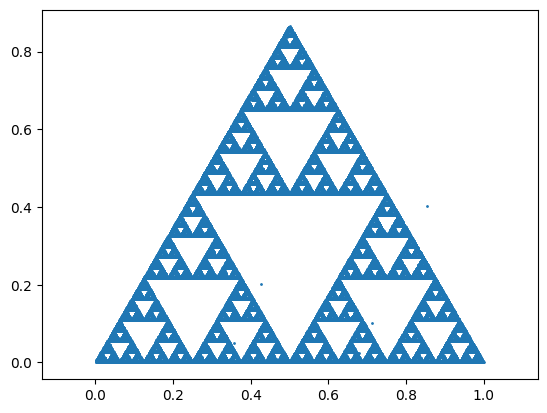

In [1]:
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(0)  # Set random seed for reproducibility

N = 100000  # throw dice this many times
r = np.random.randint(1, 4, N)  # pick N random numbers between 1 and 3
t = np.array([[0, 0], [1, 0], [1/2, np.sqrt(3)/2]])  # coordinates of three points
p = np.zeros((N, 2))

# Initialize starting point randomly
p[0] = np.random.rand(2)

for n in range(N - 1):
    p[n + 1] = (t[r[n] - 1] + p[n]) / 2  # go midway between point chosen at random

plt.plot(p[:, 0], p[:, 1], '.', markersize=2)
plt.axis('equal')
plt.show()

## Pointwise correlation dimension

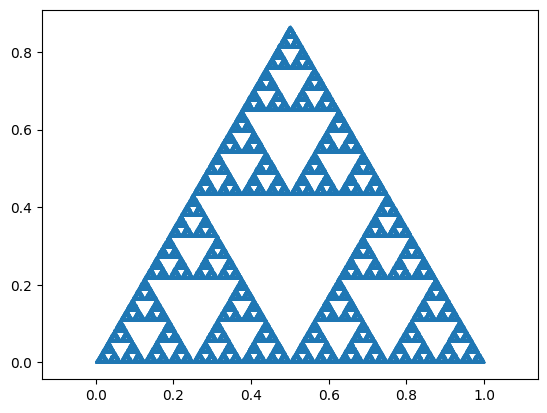

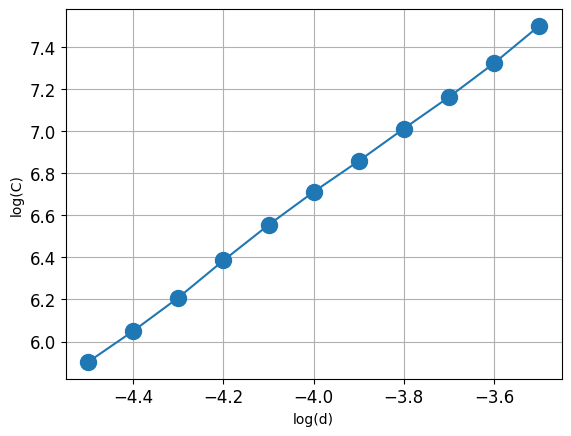

In [10]:
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(0)  # Set random seed for reproducibility

# Make the Sierpinski triangle
N = 200000
r = np.ceil(np.random.rand(N) * 3).astype(int)
t = np.array([[0, 0], [1, 0], [1/2, np.sqrt(3)/2]])
p = np.zeros((N, 2))
for n in range(N - 1):
    p[n + 1] = (t[r[n] - 1] + p[n]) / 2

plt.plot(p[:, 0], p[:, 1], '.', markersize=1)
plt.axis('equal')
plt.show()

# d = np.exp(np.linspace(-10, 1, 11)) # the radii of circles
d = np.exp(np.linspace(-4.5, -3.5, 11))  # precise calculation
C = np.zeros_like(d)  # in this variable we keep the average number of points enclosed
N = p.shape[0]  # the number of points
Nc = 1000  # number of points that were selected at random to average C
r = np.random.permutation(N)[:Nc]
for n in range(Nc):
    for m in range(len(d)):
        # find number of points engulfed
        C[m] += np.sum((p[:, 0] - p[r[n], 0])**2 + (p[:, 1] - p[r[n], 1])**2 < d[m]**2)
C /= Nc  # getting the average

plt.figure()
plt.plot(np.log(d), np.log(C), '.-', markersize=23)
plt.xlabel('log(d)')
plt.ylabel('log(C)')
plt.grid(True)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

### Self-similarity dimension

In [11]:
# Find linear fit parameters
fit_params = np.polyfit(np.log(d), np.log(C), 1)

# Extract slope and intercept
slope = fit_params[0]

# Print the linear fit parameters
print("Pointwise correlation dimension:", slope)
print("Self-similarity dimension:", np.log(3)/np.log(2))

Pointwise correlation dimension: 1.5895676002705164
Self-similarity dimension: 1.5849625007211563


## Julia set

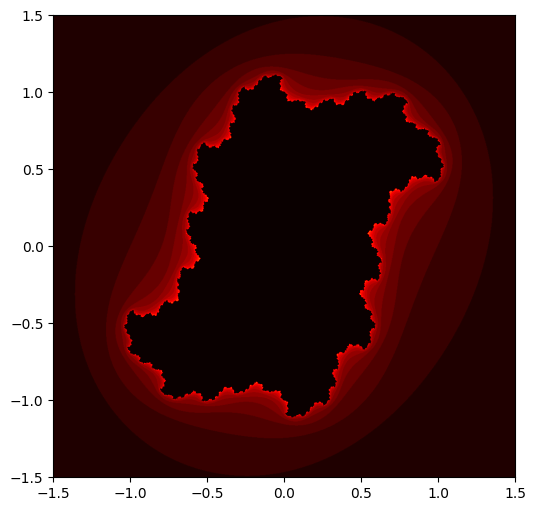

In [15]:
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import clear_output

c = 0.2 + 1j * 0.4
N = 1000
max_iter = 100
x_min, x_max = -1.5, 1.5
y_min, y_max = -1.5, 1.5
x, y = np.meshgrid(np.linspace(x_min,x_max,N), np.linspace(y_min,y_max,N))
z = x + 1j * y

s = np.zeros(z.shape, dtype=int)
for n in range(1,max_iter):
    nz = np.where(np.abs(z) < 2)
    z[nz] = z[nz]**2 + c
    s[np.where((np.abs(z) > 2) & (s == 0))] = n

plt.figure(figsize=(6,6))
plt.imshow(s, extent=(x_min, x_max, y_min, y_max), cmap='hot')
plt.show()

### Julias within Mandelbrot

In [16]:
import pygame
import numpy as np

# Function to generate the Mandelbrot set
def mandelbrot_set(xmin, xmax, ymin, ymax, width, height, max_iter):
    x = np.linspace(xmin, xmax, width)
    y = np.linspace(ymin, ymax, height)
    X, Y = np.meshgrid(x, y)
    C = X + 1j * Y
    Z = np.zeros_like(C)
    iteration = np.zeros(C.shape, dtype=int)

    for i in range(max_iter):
        mask = np.abs(Z) <= 2
        Z[mask] = Z[mask] ** 2 + C[mask]
        iteration[mask] = i
    iteration[iteration == max_iter-1] = 0

    return iteration


def julia_set(width, height, max_iter, c):
    xmin, xmax = -2.0, 2.0
    ymin, ymax = -2.0, 2.0
    x = np.linspace(xmin, xmax, width//3)
    y = np.linspace(ymin, ymax, height//3)
    X, Y = np.meshgrid(x, y)
    Z = X + 1j * Y
    iteration = np.zeros(Z.shape, dtype=int)

    for i in range(max_iter):
        mask = np.abs(Z) <= 2
        Z[mask] = Z[mask] ** 2 + c
        iteration[mask] = i
    iteration[iteration == max_iter-1] = 0

    # Create a new Pygame surface
    julia_surface = pygame.surfarray.make_surface(iteration.T)

    return julia_surface


def zoom(xmin, xmax, ymin, ymax, mouse_x, mouse_y, window_width, window_height, zoom_factor):
    # Calculate the new xmin, xmax, ymin, ymax based on the mouse position
    x_range = xmax - xmin
    y_range = ymax - ymin
    x_mid = xmin + (mouse_x / window_width) * x_range
    y_mid = ymin + (mouse_y / window_height) * y_range

    new_xmin = x_mid - x_range / zoom_factor / 2
    new_xmax = x_mid + x_range / zoom_factor / 2
    new_ymin = y_mid - y_range / zoom_factor / 2
    new_ymax = y_mid + y_range / zoom_factor / 2
    
    # Update the parameters for generating the Mandelbrot set
    xmin, xmax = new_xmin, new_xmax
    ymin, ymax = new_ymin, new_ymax
    
    # Generate the new Mandelbrot set
    s = mandelbrot_set(xmin, xmax, ymin, ymax, window_width, window_height, max_iter)
    
    # Create a new Pygame surface
    surface = pygame.surfarray.make_surface(s.T)
    
    # Blit the new surface onto the window
    window.blit(surface, (0, 0))
    
    # Update the display
    pygame.display.flip()

    return xmin, xmax, ymin, ymax, surface



def julia_cycles(width, height, max_iter, c, x0, y0):
    xmin, xmax = -2.0, 2.0
    ymin, ymax = -2.0, 2.0

    z = c
    for i in range(max_iter):
        z = z**2 + c
        if np.abs(z) > 2:
            break
        xz = x0 + int((np.real(z) - xmin) / (xmax - xmin) * width//3)
        yz = y0 + int((np.imag(z) - ymin) / (ymax - ymin) * height//3)
        pygame.draw.circle(window, (int(50+i/max_iter*200), int(50+i/max_iter*200), 0), (xz, yz), 5)

    # Update the display
    pygame.display.flip()


def cycles(xmin, xmax, ymin, ymax, window_width, window_height, max_iter):
    # Get the position of the mouse
    mouse_pos = pygame.mouse.get_pos()
    
    x = (mouse_pos[0] / window_width) * (xmax - xmin) + xmin
    y = (mouse_pos[1] / window_height) * (ymax - ymin) + ymin
    c0 = x + 1j * y
    z = 0
    for i in range(max_iter):
        z = z**2 + c0
        if np.abs(z) > 2:
            break
        xz = int((np.real(z) - xmin) / (xmax - xmin) * window_width)
        yz = int((np.imag(z) - ymin) / (ymax - ymin) * window_height)
        pygame.draw.circle(window, (int(50+i/max_iter*200), int(50+i/max_iter*200), 0), (xz, yz), 5)

    # Update the display
    pygame.display.flip()

# Parameters
xmin, xmax = -2.0, 1.0
ymin, ymax = -1.5, 1.5
window_width, window_height = 1000, 1000
max_iter = 200

# Generate the Mandelbrot set
s = mandelbrot_set(xmin, xmax, ymin, ymax, window_width, window_height, max_iter)

# Initialize Pygame
pygame.init()

# Create a Pygame surface
surface = pygame.surfarray.make_surface(s.T)
julia_surface = julia_set(window_width, window_height, max_iter, 0)

# Create a Pygame window
window = pygame.display.set_mode((window_width, window_height))

# Blit the surface onto the window
window.blit(surface, (0, 0))
window.blit(julia_surface, (0, 0))

# Update the display
pygame.display.flip()

# Main loop
running = True
zoom_in = 2.0  # Zoom factor for zooming in
zoom_out = 0.5  # Zoom factor for zooming out
while running:
    # Get the mouse position
    mouse_x, mouse_y = pygame.mouse.get_pos()
    # Draw the Julia set
    x = (mouse_x / window_width) * (xmax - xmin) + xmin
    y = (mouse_y / window_height) * (ymax - ymin) + ymin
    c = x + 1j * y
    julia_surface = julia_set(window_width, window_height, max_iter, c)

    # Blit the new surface onto the window
    window.blit(surface, (0, 0))
    window.blit(julia_surface, (mouse_x, mouse_y))
    
    julia_cycles(window_width, window_height, max_iter, c, mouse_x, mouse_y)
    # cycles(xmin, xmax, ymin, ymax, window_width, window_height, max_iter)

    for event in pygame.event.get():
        if event.type == pygame.QUIT:
            running = False
        elif event.type == pygame.KEYDOWN:
            if event.key == pygame.K_z:
                # Get the mouse position
                mouse_x, mouse_y = pygame.mouse.get_pos()
                # Zoom in
                xmin, xmax, ymin, ymax, surface = \
                    zoom(xmin, xmax, ymin, ymax, mouse_x, mouse_y, window_width, window_height, zoom_in)
            elif event.key == pygame.K_x:
                # Get the mouse position
                mouse_x, mouse_y = pygame.mouse.get_pos()
                # Zoom out
                xmin, xmax, ymin, ymax, surface = \
                    zoom(xmin, xmax, ymin, ymax, mouse_x, mouse_y, window_width, window_height, zoom_out)
            elif event.key == pygame.K_r:
                # Reset the parameters
                xmin, xmax = -2.0, 1.0
                ymin, ymax = -1.5, 1.5
                # Generate the Mandelbrot set
                xmin, xmax, ymin, ymax, surface = \
                    zoom(xmin, xmax, ymin, ymax, mouse_x, mouse_y, window_width, window_height, 1)
            elif event.key == pygame.K_j:
                # Get the mouse position
                mouse_x, mouse_y = pygame.mouse.get_pos()
                # Draw the Julia set
                x = (mouse_x / window_width) * (xmax - xmin) + xmin
                y = (mouse_y / window_height) * (ymax - ymin) + ymin
                c = x + 1j * y
                julia_surface = julia_set(window_width, window_height, max_iter, c)

# Quit Pygame
pygame.quit()

pygame 2.3.0 (SDL 2.24.2, Python 3.10.8)
Hello from the pygame community. https://www.pygame.org/contribute.html


2024-03-28 14:03:32.097 Python[31395:2498237] WARNING: Secure coding is not enabled for restorable state! Enable secure coding by implementing NSApplicationDelegate.applicationSupportsSecureRestorableState: and returning YES.


KeyboardInterrupt: 

: 

## Barnsley's fern

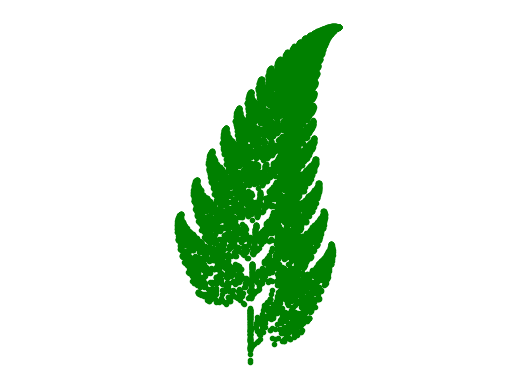

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Clear the workspace

# Define transformation matrices
A = np.zeros((2, 3, 4))
A[:, :, 0] = np.array([[0.00, 0.00, 0.00],
                        [0.00, 0.16, 0.00]])
A[:, :, 1] = np.array([[0.85, 0.04, 0.00],
                        [-0.04, 0.85, 1.60]])
A[:, :, 2] = np.array([[0.20, -0.26, 0.00],
                        [0.23, 0.22, 1.60]])
A[:, :, 3] = np.array([[-0.15, 0.28, 0.00],
                        [0.26, 0.24, 0.44]])

# Generate random numbers
N = 10000
r = np.random.rand(N)

# Initialize points
p = np.zeros((2, N))

# Iterate through each random number
for n in range(N - 1):
    if r[n] < 0.01:
        p[:, n + 1] = A[:, :, 0][:, :2] @ p[:, n] + A[:, :, 0][:, 2]
    elif r[n] < 0.86:
        p[:, n + 1] = A[:, :, 1][:, :2] @ p[:, n] + A[:, :, 1][:, 2]
    elif r[n] < 0.93:
        p[:, n + 1] = A[:, :, 2][:, :2] @ p[:, n] + A[:, :, 2][:, 2]
    else:
        p[:, n + 1] = A[:, :, 3][:, :2] @ p[:, n] + A[:, :, 3][:, 2]

# Plot points
plt.plot(p[0], p[1], 'g.')
plt.axis('equal')
plt.axis('off')
plt.show()


### Mapping the fern

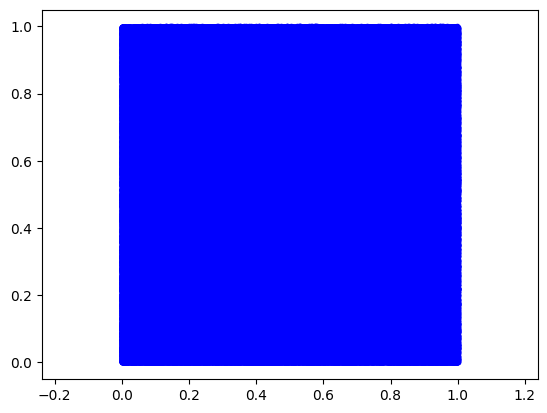

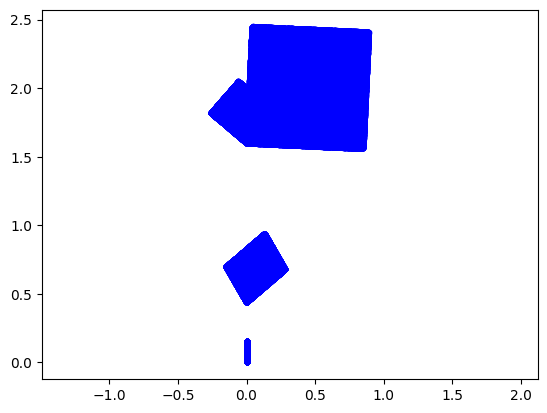

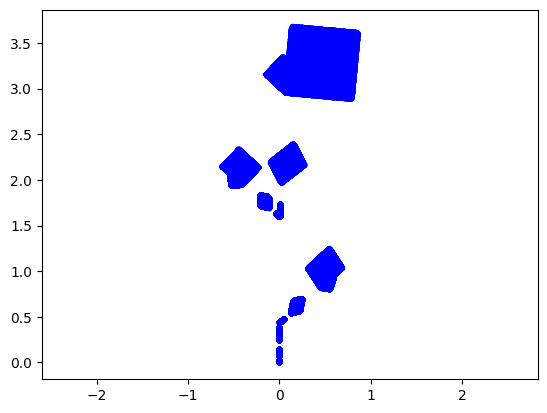

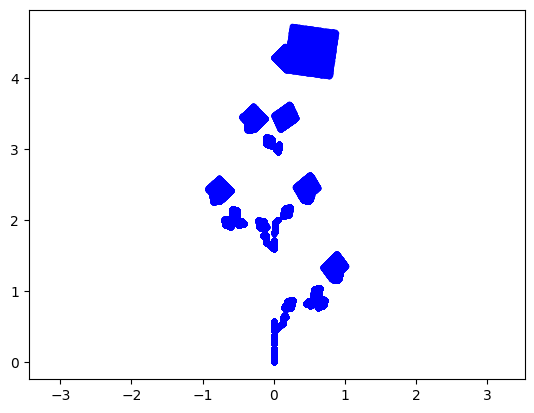

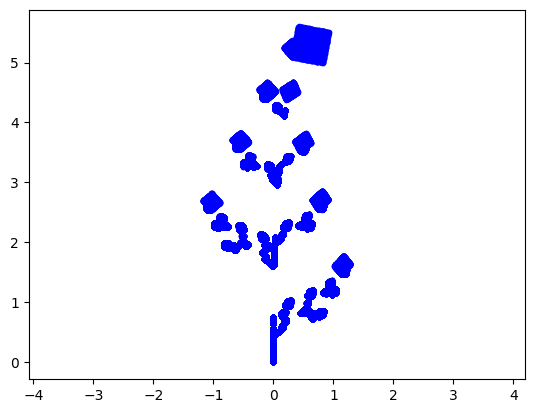

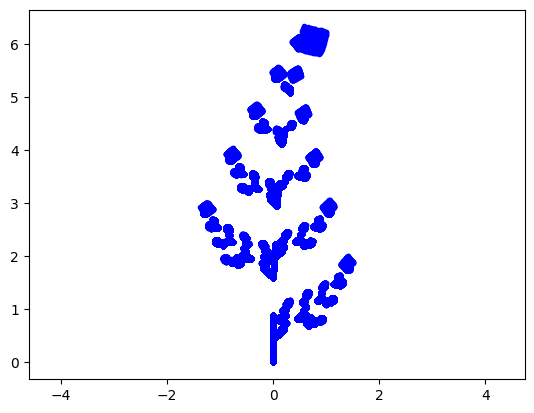

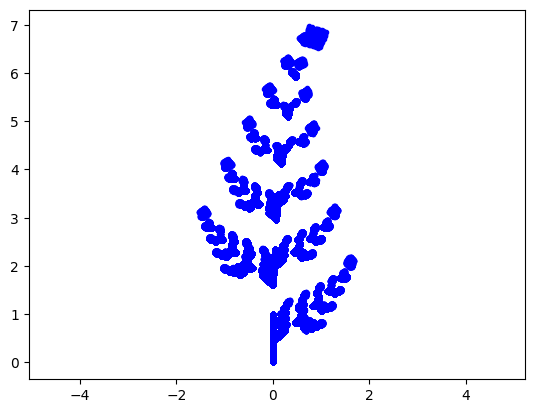

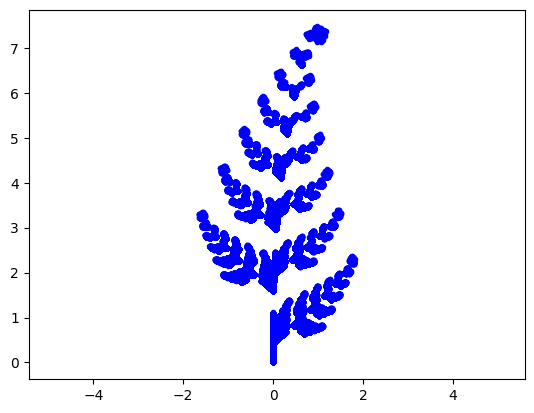

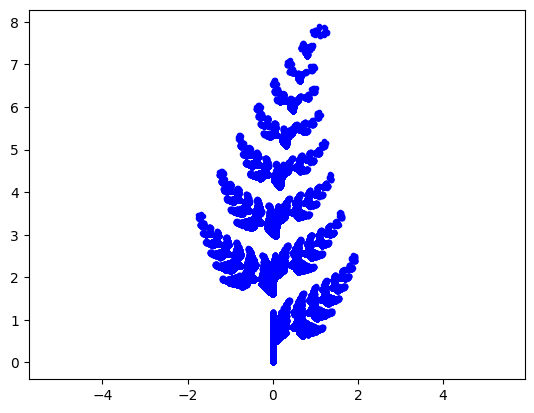

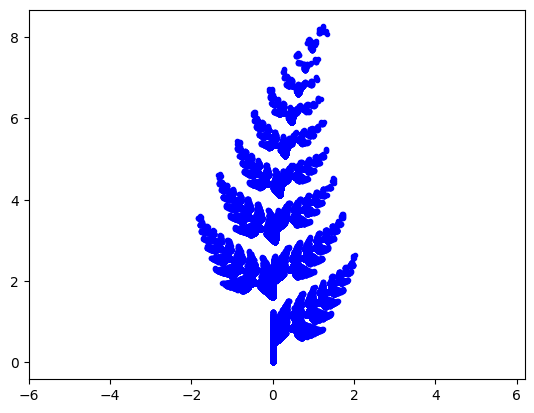

In [3]:
import numpy as np
import matplotlib.pyplot as plt

# Define transformation matrices
A = np.zeros((2, 3, 4))
A[:, :, 0] = np.array([[0.00, 0.00, 0.00],
                       [0.00, 0.16, 0.00]])
A[:, :, 1] = np.array([[0.85, 0.04, 0.00],
                       [-0.04, 0.85, 1.60]])
A[:, :, 2] = np.array([[0.20, -0.26, 0.00],
                       [0.23, 0.22, 1.60]])
A[:, :, 3] = np.array([[-0.15, 0.28, 0.00],
                       [0.26, 0.24, 0.44]])

# Number of iterations
N = 1000000

# Generate random points
p = np.random.rand(2, N)

# Iterate through each transformation
for _ in range(10):
    plt.plot(p[0], p[1], 'b.')
    plt.axis('equal')
    plt.show()
    plt.pause(0.1)

    # Shuffle the points
    r = np.random.permutation(N)

    # Apply transformations
    q = np.zeros((2, N))
    for n in range(4):
        q[:, n * N // 4: (n + 1) * N // 4] = \
            A[:, :, n][:, :2] @ p[:, r[n * N // 4: (n + 1) * N // 4]] + \
            A[:, :, n][:, 2].reshape(2, 1)

    # Update points
    p = q


## L-systems

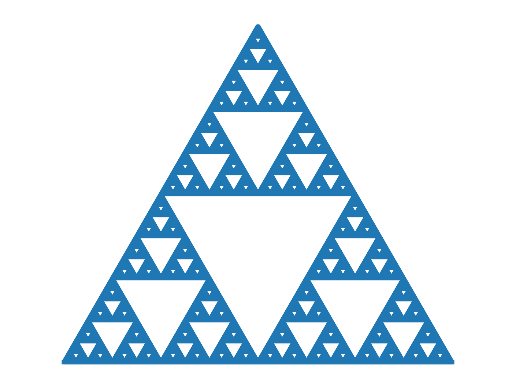

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Initialize string
a = 'A'

# Apply string transformations
for _ in range(10):
    a = a.replace('A', 'a').replace('B', 'b').replace('a', 'B-A-B').replace('b', 'A+B+A')

# Initialize variables
r = np.zeros((a.count('A') + a.count('B') + 1, 2))
move = np.zeros((6, 2))
move[:, 0] = np.cos(np.arange(6) * 2 * np.pi / 6)
move[:, 1] = np.sin(np.arange(6) * 2 * np.pi / 6)
np = 0
m = 0

# Iterate through each character in the string
for char in a:
    if char == '-':
        m = (m - 1) % 6
    elif char == '+':
        m = (m + 1) % 6
    elif char == 'A' or char == 'B':
        np += 1
        r[np] = r[np - 1] + move[m]

# Plot the result
plt.figure()
plt.plot(r[:, 0], r[:, 1], linewidth=3)
plt.axis('equal')
plt.axis('off')
plt.show()

https://en.wikipedia.org/wiki/Hofstadter%27s_butterfly

https://www.youtube.com/watch?v=1JdS-1-yYu8&t=4251s

https://en.wikipedia.org/wiki/Douglas_Hofstadter

https://en.wikipedia.org/wiki/Gödel,_Escher,_Bach

https://www.youtube.com/watch?v=HeQX2HjkcNo

https://en.wikipedia.org/wiki/I_Am_a_Strange_Loop
